In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [19]:
stock = pd.DataFrame(pd.read_csv("stock.txt", sep=','))
stock.head(10)


,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579,0
1,1962-01-03,0.6201,0.6201,0.6122,0.6201,1764749,0
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010,0
3,1962-01-05,0.6122,0.6122,0.5798,0.5957,3255244,0
4,1962-01-08,0.5957,0.5957,0.5716,0.5957,3696430,0
5,1962-01-09,0.5957,0.6037,0.5878,0.5957,2778285,0
6,1962-01-10,0.5957,0.6037,0.5957,0.5957,2337096,0
7,1962-01-11,0.5957,0.5957,0.5878,0.5957,1943605,0
8,1962-01-12,0.5957,0.6037,0.5878,0.5878,2015151,0
9,1962-01-15,0.5957,0.5957,0.5957,0.5957,2527879,0


In [20]:
stock.drop("Date", axis=0, inplace=True)
stock.drop("OpenInt", axis=1, inplace=True)

KeyError: "['Date'] not found in axis"

In [21]:
stock.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579,0
1,1962-01-03,0.6201,0.6201,0.6122,0.6201,1764749,0
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010,0
3,1962-01-05,0.6122,0.6122,0.5798,0.5957,3255244,0
4,1962-01-08,0.5957,0.5957,0.5716,0.5957,3696430,0


In [22]:
stock["Volume"] = stock["Volume"] / np.linalg.norm(stock["Volume"])
stock.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,0.000523,0
1,1962-01-03,0.6201,0.6201,0.6122,0.6201,0.000359,0
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,0.000446,0
3,1962-01-05,0.6122,0.6122,0.5798,0.5957,0.000661,0
4,1962-01-08,0.5957,0.5957,0.5716,0.5957,0.000751,0


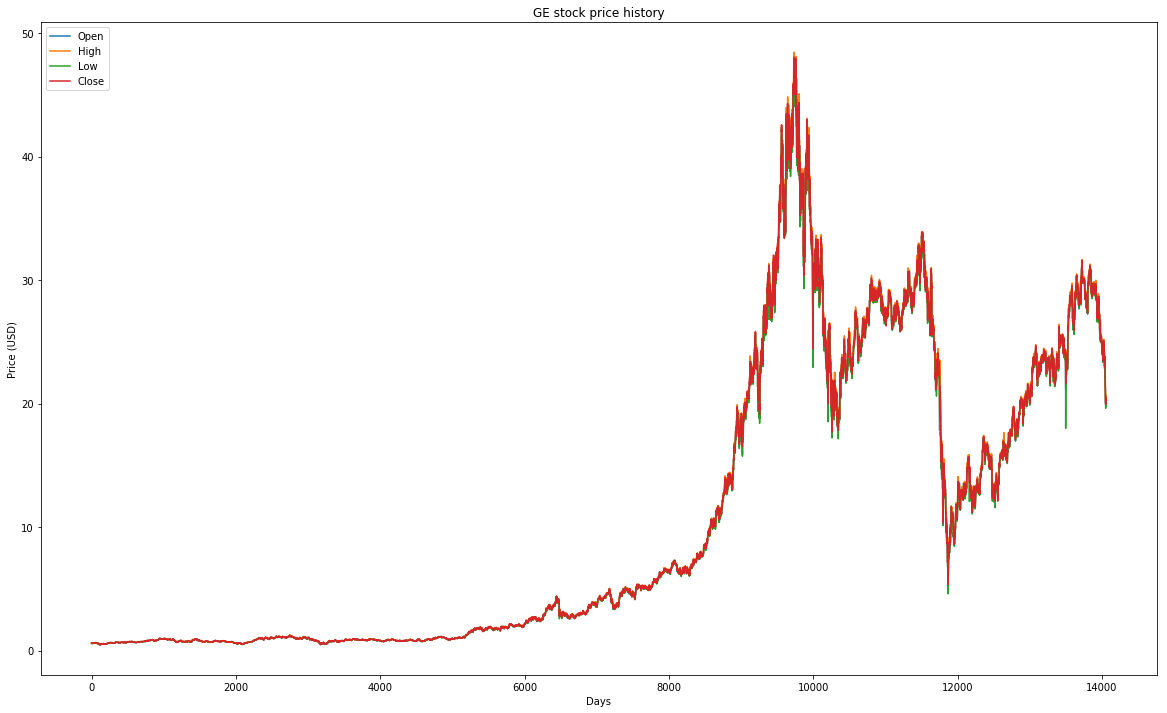

In [23]:
plt.figure(figsize=(20,12))
plt.plot(stock["Open"])
plt.plot(stock["High"])
plt.plot(stock["Low"])
plt.plot(stock["Close"])
plt.title('GE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')

plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

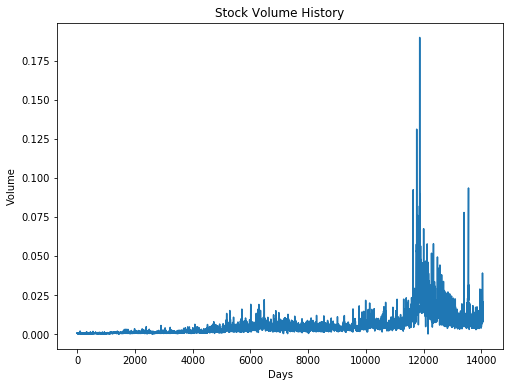

In [24]:
plt.figure(figsize=(8,6))
plt.plot(stock["Volume"])
plt.title("Stock Volume History")
plt.ylabel("Volume")
plt.xlabel("Days")
plt.show()

In [25]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [26]:
X = stock.drop("Close", axis=1)
Y = stock["Close"]
X.head()

,Date,Open,High,Low,Volume,OpenInt
0,1962-01-02,0.6277,0.6362,0.6201,0.000523,0
1,1962-01-03,0.6201,0.6201,0.6122,0.000359,0
2,1962-01-04,0.6201,0.6201,0.6037,0.000446,0
3,1962-01-05,0.6122,0.6122,0.5798,0.000661,0
4,1962-01-08,0.5957,0.5957,0.5716,0.000751,0


In [27]:
X = X.values[:3000,:]
Y = Y[:3000,:]

ValueError: Can only tuple-index with a MultiIndex

In [28]:
Y = Y.reshape(-1,1)

AttributeError: 'Series' object has no attribute 'reshape'

In [56]:
Y.shape 

(3000, 1)

In [11]:
X.shape

(14058, 6)

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [58]:
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

In [59]:
X_train.shape

(4, 2100)

In [60]:
Y_train.shape

(1, 2100)

In [16]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x/e_x.sum(axis=0)

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [18]:
def initialize_parameters(n_a,n_x,n_y):
    Wf = np.random.randn(n_a, n_a+n_x)
    bf = np.random.randn(n_a,1)
    Wi = np.random.randn(n_a, n_a+n_x)
    bi = np.random.randn(n_a,1)
    Wo = np.random.randn(n_a, n_a+n_x)
    bo = np.random.randn(n_a,1)
    Wc = np.random.randn(n_a, n_a+n_x)
    bc = np.random.randn(n_a,1)
    Wy = np.random.randn(n_y,n_a)
    by = np.random.randn(n_y,1)
    
    parameters = {"Wf": Wf, "Wi": Wi, "Wo": Wo, "Wc": Wc, "Wy": Wy, "bf": bf, "bi": bi, "bo": bo, "bc": bc, "by": by}
    
    return parameters

In [36]:
def lstm_cell_forward(xt,a_prev,c_prev,parameters):
    Wf = parameters["Wf"]
    bf = parameters["bf"]
    Wi = parameters["Wi"]
    bi = parameters["bi"]
    Wc = parameters["Wc"]
    bc = parameters["bc"]
    Wo = parameters["Wo"]
    bo = parameters["bo"]
    Wy = parameters["Wy"]
    by = parameters["by"]
    
    n_x,m = xt.shape
    n_y, n_a = Wy.shape
    
    concat = np.zeros((n_a+n_x,m))
    concat[: n_a,:] = a_prev
    concat[n_a :,:] = xt
    
    ft = sigmoid(np.dot(Wf,concat) +bf)
    it = sigmoid(np.dot(Wi,concat) +bi)
    cct = np.tanh(np.dot(Wc,concat)+bc)
    c_next = (ft * c_prev) + (it * cct)
    ot = sigmoid(np.dot(Wo, concat)+bo)
    a_next = ot*(np.tanh(c_next))
    
    yt_pred = np.dot(Wy, a_next)+by
    
    cache = (a_next, c_next, a_prev, c_prev, ft,it,cct,ot,xt,parameters)
    
    return a_next, c_next, yt_pred, cache
    

In [143]:
def lstm_forward(x,a0,parameters):
    
    caches = []
    m=1
#     print(parameters["Wy"].shape)
    n_x,T_x = x.shape
    n_y, n_a = parameters["Wy"].shape
    
    a = np.zeros((n_a,T_x))
    c = np.zeros((n_a,T_x))
    y = np.zeros((n_y,T_x))
    
    a_next = a0
    c_next = np.zeros(a_next.shape)
    
    for t in range(T_x):
#         print(a_next.shape, c_next.shape,x.values[:,t].shape)
#         print(a_next)
        a_next, c_next,yt,cache = lstm_cell_forward(x[:,t].reshape(-1,1),a_next,c_next,parameters)
        a[:,t] = a_next.reshape(-1,)
        c[:,t] = c_next.reshape(-1,)
        y[:,t] = yt.reshape(-1,)
        
        caches.append(cache)
        
    caches = (caches, x)

    return a,y,c,caches

In [38]:
def compute_cost(Y,y):
    cost = ((1/2)*(np.power((y-Y),2)))
    YH = (y-Y)
#     print(YH)
    return cost, YH

In [29]:
def lstm_cell_backward(da_next, dc_next, cache, y_h):
    
    (a_next, c_next, a_prev, c_prev, ft, it, cct, ot, xt, parameters) = cache
#     print(a_next.shape)
#     print(y_h)
    
    n_x,m = xt.shape
    n_a,m = a_next.shape
    
    dot =   da_next*np.tanh(c_next)
    dcct = (da_next*ot*(1-np.power(np.tanh(c_next), 2))+dc_next)*it
    dit =  (da_next*ot*(1-np.power(np.tanh(c_next), 2))+dc_next)*cct
    dft =  (da_next*ot*(1-np.power(np.tanh(c_next), 2))+dc_next)*c_prev
    
    dit =  dit*it*(1-it)
    dft =  dft*ft*(1-ft)
    dot =  dot*ot*(1-ot)
    dcct = dcct*(1-np.power(cct, 2))
    
    concat = np.zeros((n_x + n_a, m))
    concat[: n_a, :] = a_prev
    concat[n_a :, :] = xt
    
    dWf = np.dot(dft, concat.T)
    dWi = np.dot(dit, concat.T)
    dWc = np.dot(dcct, concat.T)
    dWo = np.dot(dot, concat.T)
    dbf = np.sum(dft, axis=1, keepdims=True)
    dbi = np.sum(dit, axis=1, keepdims=True)
    dbc = np.sum(dcct, axis=1, keepdims=True)
    dbo = np.sum(dot, axis=1, keepdims=True)
    
    dWy = np.dot(y_h , a_next.T)
    dby = np.sum(y_h, axis=1, keepdims=True)
    
    
    
    da_prevx = np.dot(parameters['Wf'].T, dft) + np.dot(parameters['Wo'].T, dot) + np.dot(parameters['Wi'].T, dit) + np.dot(parameters['Wc'].T, dcct)  
    da_prev = da_prevx[: n_a, :]
    dc_prev = (da_next*ot*(1-np.power(np.tanh(c_next), 2))+dc_next)*ft
    dxt = da_prevx[n_a :, :]
    
    gradients = {"dxt": dxt, "da_prev": da_prev, "dc_prev": dc_prev, "dWf": dWf,"dbf": dbf, "dWi": dWi,"dbi": dbi,
                "dWc": dWc,"dbc": dbc, "dWo": dWo,"dbo": dbo, "dWy":dWy,"dby":dby}
    
    return gradients

In [30]:
def lstm_backward(a, caches,YH):
    (caches, x) = caches
    (a1, c1, a0, c0, f1, i1, cc1, o1, x1, parameters) = caches[0]
    
    n_a, T_x = a.shape
    n_x,m = x1.shape
    da = np.dot(parameters["Wy"].T , YH)
    dx = np.zeros((n_x, T_x))
    da0 = np.zeros((n_a, m))
    da_prev = np.zeros((n_a, m))
    dc_prev = np.zeros((n_a, m))
    dWf = np.zeros((n_a, n_a + n_x))
    dWi = np.zeros((n_a, n_a + n_x))
    dWc = np.zeros((n_a, n_a + n_x))
    dWo = np.zeros((n_a, n_a + n_x))
    dWy = np.zeros((1, n_a))
    dby = np.zeros((1,m))
    dbf = np.zeros((n_a, 1))
    dbi = np.zeros((n_a, 1))
    dbc = np.zeros((n_a, 1))
    dbo = np.zeros((n_a, 1))
    
    
    for t in reversed(range(T_x)):
        gradients = lstm_cell_backward(da[:,t].reshape(-1,1) + da_prev, dc_prev, caches[t], YH[:,t ].reshape(-1,1))
        
        dx[:,t] = gradients["dxt"].reshape(-1,)
        dWf = gradients["dWf"]
        dWi = gradients["dWi"]
        dWc = gradients["dWc"]
        dWo = gradients["dWo"]
        dWy = gradients["dWy"]
        dbf = gradients["dbf"]
        dbi = gradients["dbi"]
        dbc = gradients["dbc"]
        dbo = gradients["dbo"]
        dby = gradients["dby"]
        
        
    da0 = gradients["da_prev"]
    
    gradients = {"dx": dx, "da0": da0, "dWf": dWf,"dbf": dbf, "dWi": dWi,"dbi": dbi,
                "dWc": dWc,"dbc": dbc, "dWo": dWo,"dbo": dbo, "dWy":dWy, "dby":dby}
    return gradients

In [49]:
def update_parameters(parameters, gradients, lr):

    parameters['Wf'] += -lr * gradients['dWf']
    parameters['bf'] += -lr * gradients['dbf']
    parameters['Wi'] += -lr * gradients['dWi']
    parameters['bi'] += -lr * gradients['dbi']
    parameters['Wc'] += -lr * gradients['dWc']
    parameters['bc'] += -lr * gradients['dbc']
    parameters['Wo'] += -lr * gradients['dWo']
    parameters['bo'] += -lr * gradients['dbo']
    parameters['Wy'] += -lr * gradients['dWy']
    parameters['bo'] += -lr * gradients['dbo']
    
    return parameters


In [76]:
def model(X, Y,num_iterations=1500,learning_rate=0.01,print_cost=True):
    costs = []
    n_x,T_x = X.shape
    n_y,T_x = Y.shape
    n_a = 5
#     print(n_x,n_y,T_x,n_a)
    parameters = initialize_parameters(n_a,n_x,n_y)
    a0 = np.random.randn(n_a,1)
    for i in range(0,num_iterations):
        a,y,c,caches = lstm_forward(X,a0, parameters)
#         print(y.shape)
        cost,YH = compute_cost(Y,y)
        cost = np.sum(cost)/T_x
#         da = ..............
        gradients = lstm_backward(a,caches,YH)
        a0 +=learning_rate * gradients["da0"]
        parameters = update_parameters(parameters,gradients,learning_rate)
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost:
            costs.append(cost)
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters, a0

Cost after iteration 0: 0.044210
Cost after iteration 1: 0.044148
Cost after iteration 2: 0.044086
Cost after iteration 3: 0.044025
Cost after iteration 4: 0.043963
Cost after iteration 5: 0.043903
Cost after iteration 6: 0.043842
Cost after iteration 7: 0.043782
Cost after iteration 8: 0.043723
Cost after iteration 9: 0.043663
Cost after iteration 10: 0.043604
Cost after iteration 11: 0.043546
Cost after iteration 12: 0.043488
Cost after iteration 13: 0.043430
Cost after iteration 14: 0.043373
Cost after iteration 15: 0.043316
Cost after iteration 16: 0.043259
Cost after iteration 17: 0.043203
Cost after iteration 18: 0.043147
Cost after iteration 19: 0.043091
Cost after iteration 20: 0.043036
Cost after iteration 21: 0.042981
Cost after iteration 22: 0.042927
Cost after iteration 23: 0.042873
Cost after iteration 24: 0.042819
Cost after iteration 25: 0.042765
Cost after iteration 26: 0.042712
Cost after iteration 27: 0.042659
Cost after iteration 28: 0.042607
Cost after iteration 29:

Cost after iteration 238: 0.036148
Cost after iteration 239: 0.036130
Cost after iteration 240: 0.036113
Cost after iteration 241: 0.036096
Cost after iteration 242: 0.036079
Cost after iteration 243: 0.036063
Cost after iteration 244: 0.036046
Cost after iteration 245: 0.036029
Cost after iteration 246: 0.036013
Cost after iteration 247: 0.035996
Cost after iteration 248: 0.035979
Cost after iteration 249: 0.035963
Cost after iteration 250: 0.035947
Cost after iteration 251: 0.035931
Cost after iteration 252: 0.035914
Cost after iteration 253: 0.035898
Cost after iteration 254: 0.035882
Cost after iteration 255: 0.035866
Cost after iteration 256: 0.035850
Cost after iteration 257: 0.035835
Cost after iteration 258: 0.035819
Cost after iteration 259: 0.035803
Cost after iteration 260: 0.035788
Cost after iteration 261: 0.035772
Cost after iteration 262: 0.035757
Cost after iteration 263: 0.035741
Cost after iteration 264: 0.035726
Cost after iteration 265: 0.035711
Cost after iteration

Cost after iteration 473: 0.033581
Cost after iteration 474: 0.033574
Cost after iteration 475: 0.033568
Cost after iteration 476: 0.033561
Cost after iteration 477: 0.033554
Cost after iteration 478: 0.033547
Cost after iteration 479: 0.033541
Cost after iteration 480: 0.033534
Cost after iteration 481: 0.033527
Cost after iteration 482: 0.033521
Cost after iteration 483: 0.033514
Cost after iteration 484: 0.033507
Cost after iteration 485: 0.033501
Cost after iteration 486: 0.033494
Cost after iteration 487: 0.033488
Cost after iteration 488: 0.033481
Cost after iteration 489: 0.033475
Cost after iteration 490: 0.033468
Cost after iteration 491: 0.033462
Cost after iteration 492: 0.033455
Cost after iteration 493: 0.033449
Cost after iteration 494: 0.033443
Cost after iteration 495: 0.033436
Cost after iteration 496: 0.033430
Cost after iteration 497: 0.033424
Cost after iteration 498: 0.033417
Cost after iteration 499: 0.033411
Cost after iteration 500: 0.033405
Cost after iteration

Cost after iteration 708: 0.032382
Cost after iteration 709: 0.032378
Cost after iteration 710: 0.032374
Cost after iteration 711: 0.032370
Cost after iteration 712: 0.032366
Cost after iteration 713: 0.032362
Cost after iteration 714: 0.032358
Cost after iteration 715: 0.032354
Cost after iteration 716: 0.032350
Cost after iteration 717: 0.032346
Cost after iteration 718: 0.032342
Cost after iteration 719: 0.032338
Cost after iteration 720: 0.032334
Cost after iteration 721: 0.032330
Cost after iteration 722: 0.032326
Cost after iteration 723: 0.032323
Cost after iteration 724: 0.032319
Cost after iteration 725: 0.032315
Cost after iteration 726: 0.032311
Cost after iteration 727: 0.032307
Cost after iteration 728: 0.032303
Cost after iteration 729: 0.032299
Cost after iteration 730: 0.032295
Cost after iteration 731: 0.032291
Cost after iteration 732: 0.032287
Cost after iteration 733: 0.032283
Cost after iteration 734: 0.032279
Cost after iteration 735: 0.032276
Cost after iteration

Cost after iteration 943: 0.031523
Cost after iteration 944: 0.031520
Cost after iteration 945: 0.031516
Cost after iteration 946: 0.031513
Cost after iteration 947: 0.031509
Cost after iteration 948: 0.031506
Cost after iteration 949: 0.031502
Cost after iteration 950: 0.031499
Cost after iteration 951: 0.031495
Cost after iteration 952: 0.031492
Cost after iteration 953: 0.031488
Cost after iteration 954: 0.031485
Cost after iteration 955: 0.031481
Cost after iteration 956: 0.031478
Cost after iteration 957: 0.031474
Cost after iteration 958: 0.031471
Cost after iteration 959: 0.031467
Cost after iteration 960: 0.031464
Cost after iteration 961: 0.031460
Cost after iteration 962: 0.031457
Cost after iteration 963: 0.031453
Cost after iteration 964: 0.031450
Cost after iteration 965: 0.031446
Cost after iteration 966: 0.031443
Cost after iteration 967: 0.031439
Cost after iteration 968: 0.031436
Cost after iteration 969: 0.031432
Cost after iteration 970: 0.031429
Cost after iteration

Cost after iteration 1173: 0.030713
Cost after iteration 1174: 0.030709
Cost after iteration 1175: 0.030706
Cost after iteration 1176: 0.030702
Cost after iteration 1177: 0.030698
Cost after iteration 1178: 0.030695
Cost after iteration 1179: 0.030691
Cost after iteration 1180: 0.030688
Cost after iteration 1181: 0.030684
Cost after iteration 1182: 0.030680
Cost after iteration 1183: 0.030677
Cost after iteration 1184: 0.030673
Cost after iteration 1185: 0.030670
Cost after iteration 1186: 0.030666
Cost after iteration 1187: 0.030662
Cost after iteration 1188: 0.030659
Cost after iteration 1189: 0.030655
Cost after iteration 1190: 0.030651
Cost after iteration 1191: 0.030648
Cost after iteration 1192: 0.030644
Cost after iteration 1193: 0.030641
Cost after iteration 1194: 0.030637
Cost after iteration 1195: 0.030633
Cost after iteration 1196: 0.030630
Cost after iteration 1197: 0.030626
Cost after iteration 1198: 0.030622
Cost after iteration 1199: 0.030619
Cost after iteration 1200: 0

Cost after iteration 1401: 0.029862
Cost after iteration 1402: 0.029859
Cost after iteration 1403: 0.029855
Cost after iteration 1404: 0.029851
Cost after iteration 1405: 0.029847
Cost after iteration 1406: 0.029843
Cost after iteration 1407: 0.029839
Cost after iteration 1408: 0.029835
Cost after iteration 1409: 0.029831
Cost after iteration 1410: 0.029828
Cost after iteration 1411: 0.029824
Cost after iteration 1412: 0.029820
Cost after iteration 1413: 0.029816
Cost after iteration 1414: 0.029812
Cost after iteration 1415: 0.029808
Cost after iteration 1416: 0.029804
Cost after iteration 1417: 0.029801
Cost after iteration 1418: 0.029797
Cost after iteration 1419: 0.029793
Cost after iteration 1420: 0.029789
Cost after iteration 1421: 0.029785
Cost after iteration 1422: 0.029781
Cost after iteration 1423: 0.029777
Cost after iteration 1424: 0.029773
Cost after iteration 1425: 0.029769
Cost after iteration 1426: 0.029766
Cost after iteration 1427: 0.029762
Cost after iteration 1428: 0

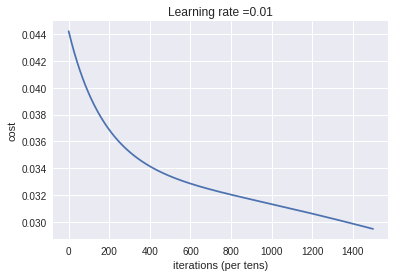

In [89]:
parameters,a0 = model(X_train, Y_train)

In [90]:
import pickle

In [91]:
pickle_out = open("parameters.pickle","wb")
pickle.dump(parameters, pickle_out)
pickle_out.close()

In [92]:
pickle_out = open("a0.pickle","wb")
pickle.dump(a0, pickle_out)
pickle_out.close()

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
pickle_in = open("parameters.pickle","rb")
parameters = pickle.load(pickle_in)

In [95]:
pickle_in = open("a0.pickle","rb")
a0 = pickle.load(pickle_in)

In [102]:
print(parameters["Wy"].shape)

(1, 5)


In [145]:
def lstm_predict(X,a0,parameters):
#     print(parameters["Wy"])
    _,predictions,_,_ = lstm_forward(X,a0,parameters)
    return predictions

In [158]:
predictions = lstm_predict(X_t,a0,parameters)